In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('train.csv')
data.shape

(1460, 81)

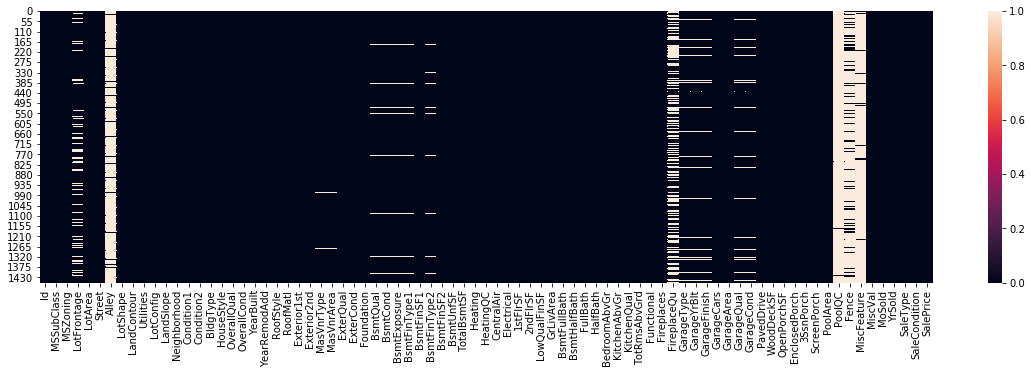

In [4]:
fig = plt.figure(figsize=(20,5))
graph = sns.heatmap(data.isnull())

### Eliminating columns with #empty cells > 50%

In [5]:
for column in data.columns:
    if data[column].isnull().sum() > len(data[column])/2:
        data.drop(column,axis=1,inplace=True)

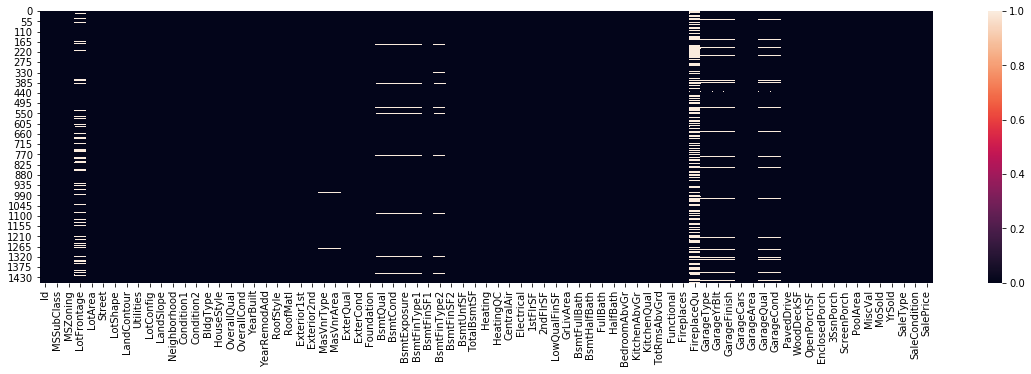

In [6]:
fig = plt.figure(figsize=(20,5))
graph = sns.heatmap(data.isnull())

# Arranging Data 

In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

### Categorical Columns

In [8]:
categorical_data=list(filter(lambda x: x not in data.describe().columns,data.columns ))

In [9]:
categorical_data[:5]

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']

### Numerical Columns

In [10]:
numerical_data=list(filter(lambda x: x in data.describe().columns,data.columns ))

In [11]:
numerical_data[:5]

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']

### adding mean values to numerical columns with empty cells

In [12]:
print(f'total empty cell: {data.isnull().sum().sum()}')
print(f'Numerical empty cells: {data[numerical_data].isnull().sum().sum()}')
print(f'Numerical empty cells: {data[categorical_data].isnull().sum().sum()}')

total empty cell: 1558
Numerical empty cells: 348
Numerical empty cells: 1210


In [13]:
for column in numerical_data:
    mean=data[column].mean()
    data[column].fillna(mean,inplace=True)

In [14]:
print(f'total empty cell: {data.isnull().sum().sum()}')
print(f'Numerical empty cells: {data[numerical_data].isnull().sum().sum()}')
print(f'Numerical empty cells: {data[categorical_data].isnull().sum().sum()}')

total empty cell: 1210
Numerical empty cells: 0
Numerical empty cells: 1210


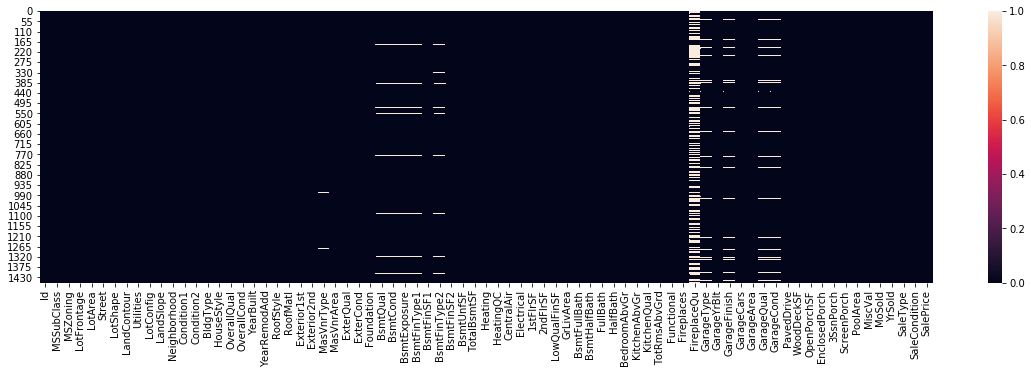

In [15]:
fig = plt.figure(figsize=(20,5))
graph = sns.heatmap(data.isnull())

### Dummies

How many new columns can we obtain by applying `pd.get_dummies()` to all categorical data?

In [16]:
value=0
for column in categorical_data:
    value=value+data[column].nunique()
print(value)    

239


In [17]:
new_data=pd.DataFrame()

In [18]:
for name in categorical_data:
    new_data=pd.concat([new_data,pd.get_dummies(data[name],drop_first=True)],axis=1)
    
len(new_data.columns)

200

### Concatenating  numerical columns to new_data.columns

In [19]:
final_data=pd.concat([new_data,data[numerical_data]],axis=1)

In [20]:
data[numerical_data].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [21]:
final_data.head()

FV  RH  RL  RM  Pave  IR2  IR3  Reg  HLS  Low  ...  WoodDeckSF  \
0   0   0   1   0     1    0    0    1    0    0  ...           0   
1   0   0   1   0     1    0    0    1    0    0  ...         298   
2   0   0   1   0     1    0    0    0    0    0  ...           0   
3   0   0   1   0     1    0    0    0    0    0  ...           0   
4   0   0   1   0     1    0    0    0    0    0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 238 columns]

# Insights

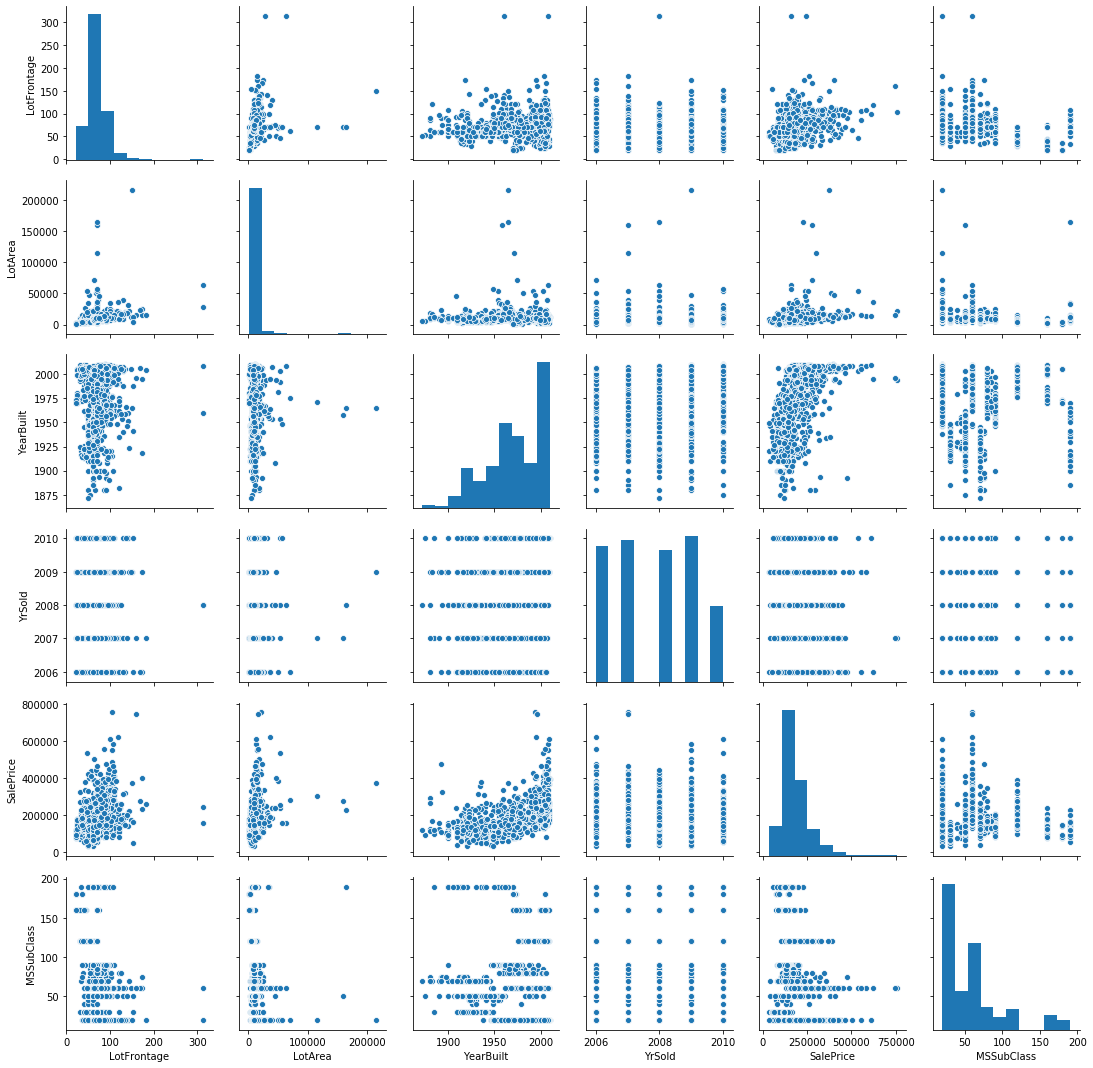

In [22]:
sns.pairplot(data[['LotFrontage','LotArea','YearBuilt','YrSold','SalePrice','MSSubClass']])

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

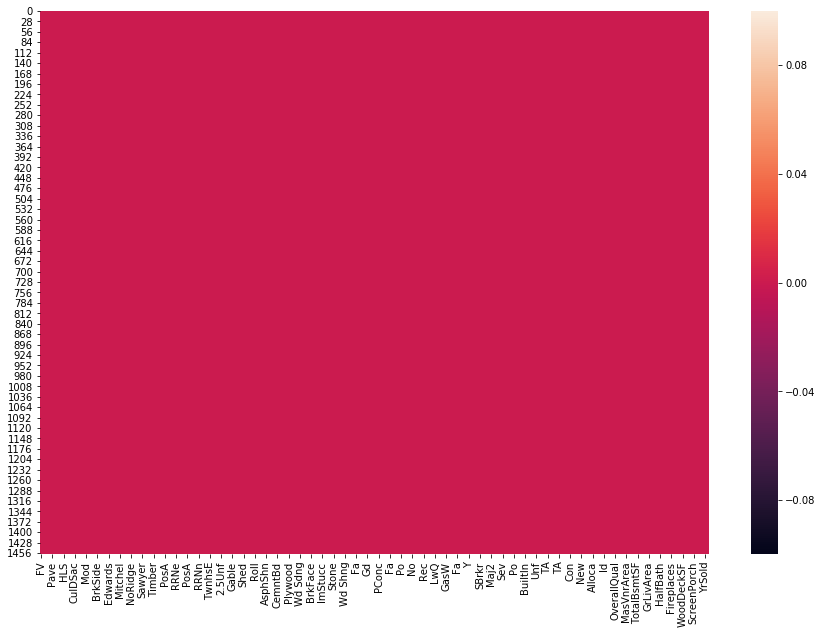

In [24]:
fig=plt.figure(figsize=(15,10))
graph=sns.heatmap(final_data.isnull())

In [52]:
y=final_data['SalePrice']
x=final_data.drop('SalePrice',axis=1)

In [53]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Learning Curve of linear regression (Degree=1)

In [79]:
from sklearn.model_selection import learning_curve

In [129]:
linear_regression=LinearRegression()
train_size,train_score,test_score=learning_curve(linear_regression,x,y,train_sizes=[400,500,600,700,800,900,1000,1100],cv=5,scoring='neg_mean_squared_error')

In [130]:
train_result=[]; test_result=[]
for i in range(len(train_score)):
    train_result.append(((train_score[i]*-1)**0.5).mean())
    test_result.append(((test_score[i]*-1)**0.5).mean())

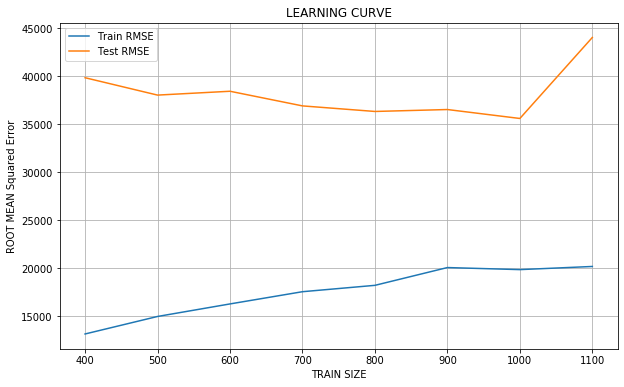

In [128]:
fig, axes=plt.subplots(figsize=(10,6))
axes.plot(train_size,train_result,label='Train RMSE')
axes.plot(train_size,test_result,label='Test RMSE')
axes.grid(True)
axes.set_title('LEARNING CURVE')
axes.set_xlabel('TRAIN SIZE')
axes.set_ylabel('ROOT MEAN Squared Error')
plt.legend()

### Linear Regression (Degree = 1)

In [54]:
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)
prediction_linear_regression=linear_regression.predict(x_test)

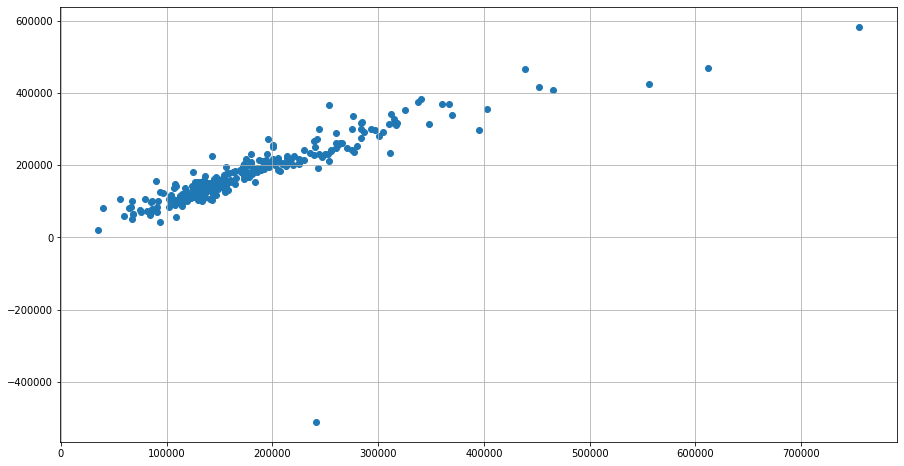

In [55]:
fig= plt.figure(figsize=(15,8))
plt.scatter(y_test,prediction_linear_regression)
plt.grid(True)

In [56]:
RMS=mean_squared_error(y_test,prediction_linear_regression)**0.5
print(RMS)

52158.58705604253


### Lineal Regression (Degree = 2)

In [57]:
poly_model=PolynomialFeatures(2)

In [58]:
X_train=poly_model.fit_transform(x_train)
X_test=poly_model.fit_transform(x_test)

In [59]:
linear_model=LinearRegression()

In [60]:
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
prediction_polynomial=linear_model.predict(X_test)

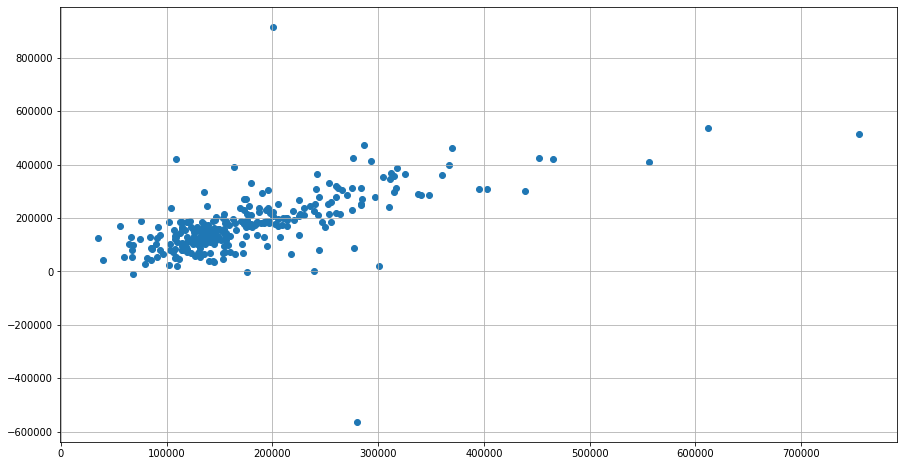

In [62]:
fig= plt.figure(figsize=(15,8))
plt.scatter(y_test,prediction_polynomial)
plt.grid(True)

In [63]:
RMS=mean_squared_error(y_test,prediction_polynomial)**0.5
RMS

91510.8714911016

### NOTE:
We obtain a lower RMS (root mean Squared error) by using a polynomial degree = 1

### Applying Cross Validation to linear Regression (degree = 1)

In [76]:
cross_validation = cross_val_score(linear_regression,x,y,cv=10,scoring='neg_mean_squared_error')
print(f'List of accuracy:\n {cross_validation}\n\nThe RMSE of the model is\n {(cross_validation.mean()*-1)**0.5}')

List of accuracy:
 [-4.28774866e+09 -5.06716546e+09 -5.42625517e+08 -1.73678419e+09
 -8.69364748e+08 -1.88666745e+09 -5.88253854e+08 -5.07947338e+08
 -3.90942772e+09 -5.14169881e+08]

The mean accuracy of the model is
 44620.79652220029


### Applying Cross Validation to linear Regression (degree = 2)

In [78]:
X = poly_model.fit_transform(x)
cross_validation = cross_val_score(linear_regression,X,y,cv=10,scoring='neg_mean_squared_error')
print(f'List of accuracy:\n {cross_validation}\n\nThe RMSE of the model is\n {(cross_validation.mean()*-1)**0.5}')

List of accuracy:
 [-7.35745695e+09 -4.55095858e+10 -4.63479769e+10 -2.89535103e+10
 -1.39606099e+10 -1.17325218e+10 -7.45230455e+09 -5.45956556e+09
 -7.73826757e+10 -2.11989777e+10]

The RMSE of the model is
 162897.26368948212


**We can see than using a more complex model do not guarantee better results since the RMSE of the linear regression with degree 1 was 44620 and with degree 2 was 162897**

### Let see how all numerical data correlates with the price of the House

In [51]:
list_correlation=[]
for i,column in enumerate(numerical_data):
    list_correlation.append(np.corrcoef(final_data['SalePrice'],final_data[column])[0,1])
    print((column,list_correlation[i]))
np.array(list_correlation).sort()

('Id', -0.02191671944343111)
('MSSubClass', -0.08428413512659526)
('LotFrontage', 0.33490085154055105)
('LotArea', 0.26384335387140573)
('OverallQual', 0.7909816005838048)
('OverallCond', -0.077855894048678)
('YearBuilt', 0.5228973328794969)
('YearRemodAdd', 0.5071009671113864)
('MasVnrArea', 0.4752413167736682)
('BsmtFinSF1', 0.38641980624215316)
('BsmtFinSF2', -0.011378121450215136)
('BsmtUnfSF', 0.21447910554696895)
('TotalBsmtSF', 0.6135805515591956)
('1stFlrSF', 0.6058521846919147)
('2ndFlrSF', 0.3193338028320677)
('LowQualFinSF', -0.02560613000067959)
('GrLivArea', 0.7086244776126522)
('BsmtFullBath', 0.22712223313149404)
('BsmtHalfBath', -0.01684415429735902)
('FullBath', 0.5606637627484456)
('HalfBath', 0.2841076755947829)
('BedroomAbvGr', 0.16821315430073996)
('KitchenAbvGr', -0.1359073708421411)
('TotRmsAbvGrd', 0.5337231555820284)
('Fireplaces', 0.46692883675152763)
('GarageYrBlt', 0.4701774537404798)
('GarageCars', 0.6404091972583531)
('GarageArea', 0.6234314389183617)
('Wo

### Learning curve with 3 features

In [76]:
data_final_features=final_data[['OverallQual','YearBuilt','YearRemodAdd','SalePrice']]
x=data_final_features[['OverallQual','YearBuilt','YearRemodAdd']]
y=data_final_features[['SalePrice']]

In [96]:
train_size, train_score, test_score =learning_curve(LinearRegression(),x,y,train_sizes=[100,200,300,400,500,600,700],cv=4)

In [97]:
train_score

array([[0.62134791, 0.77451027, 0.77451027, 0.77451027],
       [0.64644817, 0.6825983 , 0.6825983 , 0.6825983 ],
       [0.66108944, 0.6851405 , 0.6851405 , 0.6851405 ],
       [0.63831509, 0.68489673, 0.69268078, 0.69268078],
       [0.62103086, 0.65438892, 0.6755908 , 0.6755908 ],
       [0.6268495 , 0.65663671, 0.67446132, 0.67446132],
       [0.63432678, 0.66028564, 0.65917849, 0.65917849]])

In [98]:
test_score

array([[0.65989168, 0.62503227, 0.60911331, 0.58067978],
       [0.67510741, 0.63822426, 0.61622494, 0.59259175],
       [0.68365568, 0.637841  , 0.61841144, 0.59298438],
       [0.68768383, 0.63716554, 0.61855927, 0.59394495],
       [0.68854099, 0.63575126, 0.61556435, 0.59101911],
       [0.6884735 , 0.63530623, 0.61818392, 0.5927932 ],
       [0.68740185, 0.63601166, 0.6156698 , 0.59129539]])

[0.7362196819476257, 0.6735607665448977, 0.6791277323434255, 0.6771433470944901, 0.6566503456717105, 0.6581022143797701, 0.653242350094076]
[0.6186792586891523, 0.630537092419047, 0.6332231279241065, 0.634338397162608, 0.6327189283598815, 0.6336892126669291, 0.6325946760726164]


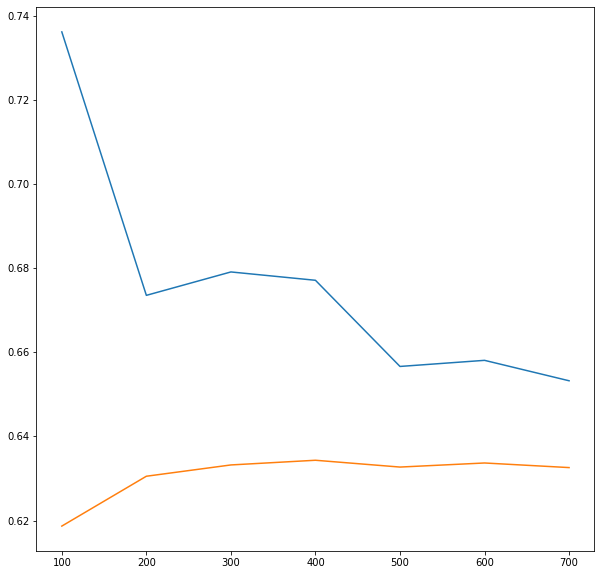

In [126]:
train_score_mean=[]
test_score_mean=[]
for number in train_score:
    train_score_mean.append(number.mean())
for number in test_score:
    test_score_mean.append(number.mean())

print(train_score_mean)
print(test_score_mean)
x=np.array(train_score_mean)
y=np.array(test_score_mean)

fig,axes=plt.subplots(1,figsize=(10,10))
axes.plot(train_size,x,label='train')
axes.plot(train_size,y,label='test')
